# Motion of a Pendulum With Drag
### The Euler-Cromer Method

Computational Physics

Micheal Jones

In [7]:
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display, Math, Latex

%matplotlib inline

In [11]:
"""
First I define some global variables, then a time range 
within which I will collect my data, then I'll set up some 
empty arrays for each variable which will be assigned 
iteration values within my range and finally I will define 
some functions and set my data arrays with initial values
"""
theta_0 = 0.1
omega_0 = 0.0
g = 10.0
m = 0.15
L = 1.0
d = 0.07
c = 0.012
"""
At first, my time range will be a little arbitrary, 
but then I will be able to manipulate it and see how my
pendulum acts over time with any given range of time and step in time, dt
"""
dt = 0.01
t = np.arange(0,100,dt)
"""
Now I have to make my empty arrays the same size as my time array 
so that they can have a data point for each step in time.
"""
angle = np.zeros(len(t))
angVel = np.zeros(len(t))
pE = np.zeros(len(t))
kE = np.zeros(len(t))
totalEnergy = np.zeros(len(t))

angle[0] = theta_0
angVel[0] = omega_0

In [12]:
"""
Here I define my step functions and energy.
"""

def omegaStep(theta, omega, dt, c, g, L):
    return(omega+(-g/L)*np.sin(theta)*dt-c*L**2*(omega)**(2)*np.sign(omega)*dt)

def thetaStep(theta,omega,dt):
    return(theta + omega*dt)

def energy(theta, omega, m, g, L):
    pE = m*g*L*(1 - np.cos(theta))
    kE = (m/2)*(L*omega)**2
    totalEnergy = pE + kE
    return pE, kE, totalEnergy

pE[0], kE[0], totalEnergy[0] = energy(angle[0], angVel[0], m, g, L)


$$ \theta_{step} \ = \ \theta_i + \omega_i \ dt $$


$$ \omega_{step} \ = ( \ \omega_i - \frac{g \ \ sin \ \theta_i \ dt}{L} \ - \ c \ L^2 \ \omega_{i}^2 \ dt) \hat{\omega} $$


In [13]:
"""
Now I need a loop to define the next iteration of my variables 
based on the previous one which will fill my data arrays
"""
for i in range(1,len(t)):
    angVel[i] = omegaStep(angle[i-1], angVel[i-1], dt, c, g, L) 
    angle[i] = thetaStep(angle[i-1], angVel[i], dt)
    pE[i], kE[i], totalEnergy[i] = energy(angle[i-1], angVel[i-1], m, g, L)
print(angVel)
print(angle)
print(totalEnergy)

[ 0.         -0.00998334 -0.01995674 ..., -0.26396025 -0.26170794
 -0.25919413]
[ 0.1         0.09990017  0.0997006  ..., -0.0224414  -0.02505848
 -0.02765042]
[ 0.00749375  0.00749375  0.00748628 ...,  0.00559873  0.00560332
  0.00560775]


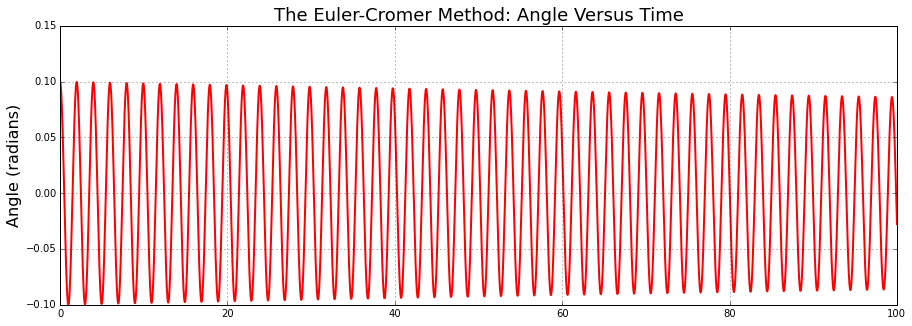

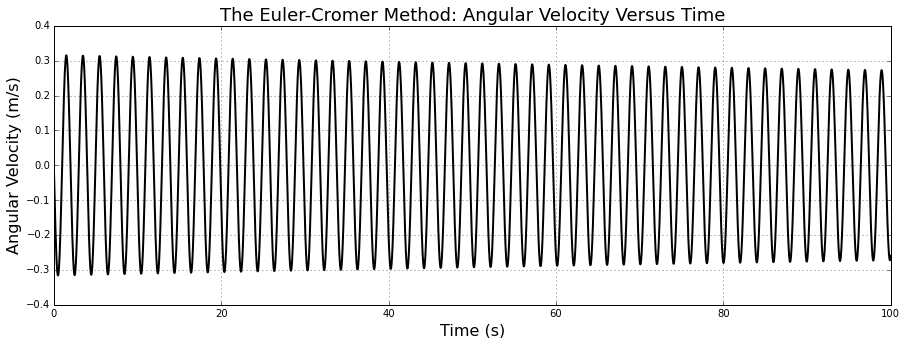

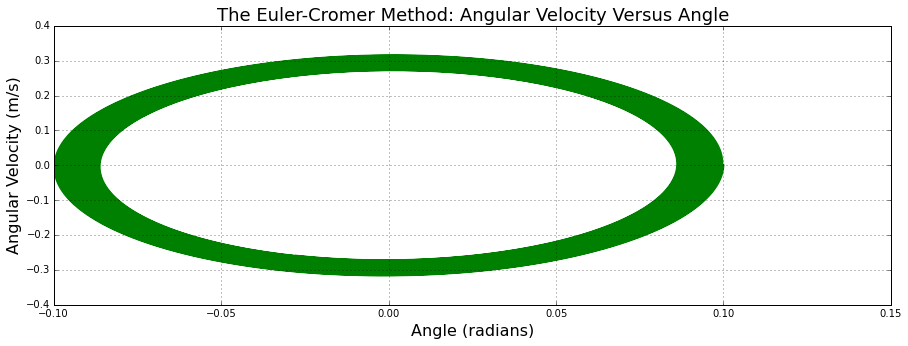

In [14]:
"""
Now I simply call my data arrays to plot them and observe the data
"""

plt.figure(1)
plt.figure(figsize=(15,5))
plt.plot(t, angle, color = 'red', linewidth= 2.0)
plt.title('The Euler-Cromer Method: Angle Versus Time', fontsize = 18)
plt.ylabel('Angle (radians)', fontsize = 16)
plt.grid(True)
#plt.xlabel('Time (s)', fontsize = 16)
#plt.show()

plt.figure(2)
plt.figure(figsize=(15,5))
plt.plot(t, angVel, color = 'black', linewidth= 2.0)
plt.title('The Euler-Cromer Method: Angular Velocity Versus Time', fontsize = 18)
plt.ylabel('Angular Velocity (m/s)', fontsize = 16)
plt.grid(True)
plt.xlabel('Time (s)', fontsize = 16)
plt.show()

plt.figure(3)
plt.figure(figsize=(15,5))
plt.plot(angle, angVel , color = 'green', linewidth= 2.0)
plt.title('The Euler-Cromer Method: Angular Velocity Versus Angle', fontsize = 18)
plt.ylabel('Angular Velocity (m/s)', fontsize = 16)
plt.xlabel('Angle (radians)', fontsize = 16)
plt.grid(True)
plt.show ()

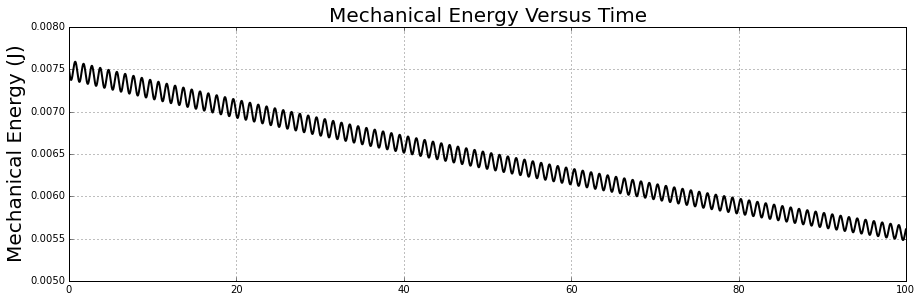

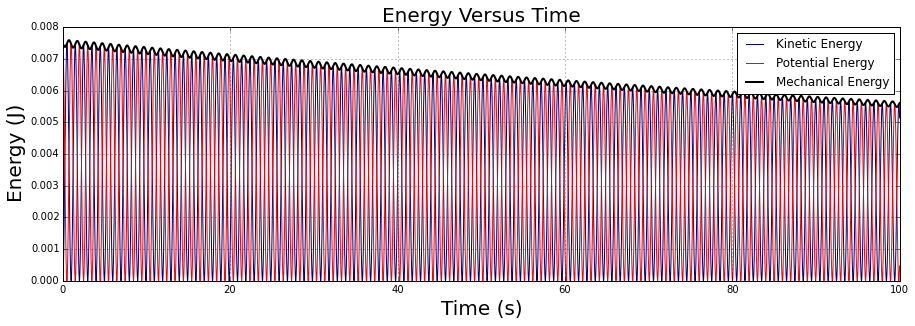

In [16]:
plt.figure(4)
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.plot(t, totalEnergy, color='black', linewidth=2.0)
plt.ylabel('Mechanical Energy (J)', size = '20')
plt.title('Mechanical Energy Versus Time', size = '20')
plt.grid(True)
plt.show()

plt.figure(5)
plt.figure(figsize=(15,10))
plt.subplot(212)
kinetic, = plt.plot(t, kE, color='navy', linewidth=1.0)
potential, = plt.plot(t, pE, color='red', linewidth=1.0)
mechanical, = plt.plot(t, totalEnergy, color='black', linewidth=2.0)
plt.ylabel('Energy (J)', size = '20')
plt.title('Energy Versus Time', size = '20')
plt.xlabel('Time (s)', size = '20')
plt.legend([kinetic, potential, mechanical], ["Kinetic Energy", "Potential Energy", "Mechanical Energy"])
plt.grid(True)
plt.show()

As expected, this data depicts a slow loss of energy  due to the external damping force. It also shows the range of angles through which the pendulum swings as well as the range of angular velocities decreases slowly with time.